In [1]:
%matplotlib inline
import pandas as pd
import pathlib as path
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import scipy.stats as stats

In [2]:
# Load the CSV file created fromm the API
pet_df = pd.read_csv("Resources/adoption.csv")

# Filter the Data
dog_df = pet_df[["type", "location"]]
dog_loc = dog_df[(dog_df["type"] == "Dog") & (dog_df["location"].isin(["New York", "Houston", "Los Angeles", "Chicago",
                                                                       "Phoenix", "Mesa", "Schaumburg", "Pearland", 
                                                                       "Yonkers", "Mission Viejo"]))]

# Rename column "location" to "city"
dog_city = dog_loc.rename(columns = {"location" : "city"})

# Display data
dog_city

,type,city
11741,Dog,New York
11746,Dog,New York
11753,Dog,New York
11775,Dog,New York
11776,Dog,New York
...,...,...
61988,Dog,Phoenix
61989,Dog,Phoenix
61993,Dog,Phoenix
62002,Dog,Phoenix


In [9]:
# Load the CSV file 
cities_df = pd.read_csv("Resources/uscities.csv")

# Reorganize the columns
cities_df = cities_df[["city", "state_id", "lat", "lng", "population", "density"]]

# Filter the Data
data_cities = cities_df[(cities_df["city"].isin(["New York", "Houston", "Los Angeles", "Chicago", "Phoenix",
                                                "Mesa", "Schaumburg", "Pearland", "Yonkers", "Mission Viejo"]))
                       & (cities_df["state_id"].isin(["NY", "TX", "CA", "IL", "AZ"]))]

# Drop the last 4 rows in the new DataFrame
data_cities.drop([10053, 13731, 20678, 21552], axis=0, inplace=True)

# Display data
data_cities

C:\Users\15512\AppData\Local\Temp\ipykernel_8236\1409710712.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cities.drop([10053, 13731, 20678, 21552], axis=0, inplace=True)


,city,state_id,lat,lng,population,density
0,New York,NY,40.6943,-73.9249,18908608,11080.3
1,Los Angeles,CA,34.1141,-118.4068,11922389,3184.7
2,Chicago,IL,41.8375,-87.6866,8497759,4614.5
4,Houston,TX,29.7860,-95.3885,5970127,1384.0
10,Phoenix,AZ,33.5722,-112.0892,4064275,1198.9
68,Mission Viejo,CA,33.6096,-117.6551,642211,2038.4
85,Mesa,AZ,33.4015,-111.7178,503390,1379.8
208,Yonkers,NY,40.9466,-73.8673,209780,4498.4
358,Pearland,TX,29.5581,-95.3218,124478,987.1
611,Schaumburg,IL,42.0308,-88.0838,77571,1548.1


In [5]:
# Merge the two csv files
data_df = pd.merge(dog_city, data_cities, on = "city")
data_df

,type,city,state_id,lat,lng,population,density
0,Dog,New York,NY,40.6943,-73.9249,18908608,11080.3
1,Dog,New York,NY,40.6943,-73.9249,18908608,11080.3
2,Dog,New York,NY,40.6943,-73.9249,18908608,11080.3
3,Dog,New York,NY,40.6943,-73.9249,18908608,11080.3
4,Dog,New York,NY,40.6943,-73.9249,18908608,11080.3
...,...,...,...,...,...,...,...
6483,Dog,Phoenix,AZ,33.5722,-112.0892,4064275,1198.9
6484,Dog,Phoenix,AZ,33.5722,-112.0892,4064275,1198.9
6485,Dog,Phoenix,AZ,33.5722,-112.0892,4064275,1198.9
6486,Dog,Phoenix,AZ,33.5722,-112.0892,4064275,1198.9


In [6]:
# Count the values of the column "city"
dog_count = data_df["city"].value_counts()
dog_count

city
Houston          2053
Los Angeles      1624
Phoenix          1009
New York          798
Mesa              404
Chicago           384
Pearland           95
Mission Viejo      52
Yonkers            45
Schaumburg         24
Name: count, dtype: int64

In [7]:
# Reorganize the Data according to the value count
count_df = data_df.value_counts().reset_index().rename(columns={"index": "city", 0: "count"})
count_df

,type,city,state_id,lat,lng,population,density,count
0,Dog,Houston,TX,29.7860,-95.3885,5970127,1384.0,2053
1,Dog,Los Angeles,CA,34.1141,-118.4068,11922389,3184.7,1624
2,Dog,Phoenix,AZ,33.5722,-112.0892,4064275,1198.9,1009
3,Dog,New York,NY,40.6943,-73.9249,18908608,11080.3,798
4,Dog,Mesa,AZ,33.4015,-111.7178,503390,1379.8,404
5,Dog,Chicago,IL,41.8375,-87.6866,8497759,4614.5,384
6,Dog,Pearland,TX,29.5581,-95.3218,124478,987.1,95
7,Dog,Mission Viejo,CA,33.6096,-117.6551,642211,2038.4,52
8,Dog,Yonkers,NY,40.9466,-73.8673,209780,4498.4,45
9,Dog,Schaumburg,IL,42.0308,-88.0838,77571,1548.1,24


In [8]:
%%capture --no-display

# Configure the map plot
map_plot = count_df.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "EsriStreet",
    frame_width = 800,
    frame_height = 400,
    size = "count",
    color="city",
    alpha=1, 
    title = "Adoptable Dogs"
)

# Save the figure
plt.savefig("Output/map.png")

# Show the map
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (city,count)

<Figure size 640x480 with 0 Axes>

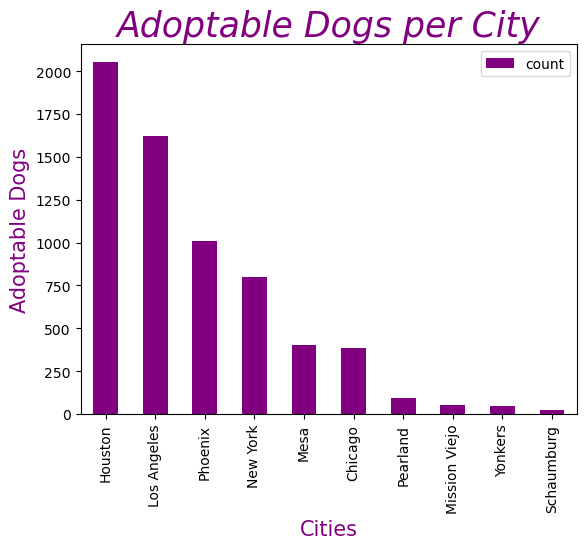

In [194]:
# Plot bar chart for count_df
count_df.plot.bar("city", "count", color = "purple")
plt.xlabel("Cities", color = "purple", fontsize = 15)
plt.ylabel("Adoptable Dogs", color = "purple", fontsize = 15)
plt.title(label = "Adoptable Dogs per City", fontsize = 25, fontstyle = "italic", color = "purple")

# Save the figure
plt.savefig("Output/Bar_graph.png")

# Show plt
plt.show()

#### According to the bar graph, dogs were given more for adoption in the metropolitan areas compare to the suburbs.

In [195]:
# Run the t-test 
stats.ttest_ind(count_df["population"], count_df["count"], equal_var=False)

TtestResult(statistic=2.5265056100027823, pvalue=0.032420724824300064, df=9.000000227659678)

#### The pvalue equal 0.03 which is less than 0.05, from that we can accept the hypothesis that the data is not normally distributed.